In [ ]:
#AAI FTC -- JOÃO VITOR FRANCO RESENDE e EDUARDO MARUM

Importando a famosa pandas para trabalhar melhor com o dicionário (irei trabalhar o afn como um dF após)
Importando a LITERAL_EVAL por ser uma melhor maneira de converter string em um dicionário



In [ ]:
import pandas as pd
from ast import literal_eval


Recebendo os primeiros INPUT's do usuário ou o arquivo externo (Quantidade de estados e letras do alfabeto)

Como exemplo, o arquivo anexado está usando o seguinte AFN : 


<img src='./afn2.png'></img>
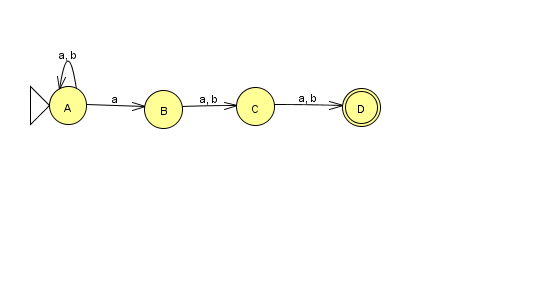

In [ ]:
# Escolher como será feito a escolha da entrada do AFN



escolha = int(input("Escolha como será feita a entrada inicial do AFN a ser convertido: (1 - Usando o arquivo test, 2 - 'Desenho' a partir de input )"))


# Recebendo o arquivo usando o modelo de dois dicionários já aninhados 
 Boa Prática para o INPUT, utilizar apenas um caracter por nome do estado

In [ ]:
if escolha == 1:
    with open("test.txt", 'r') as input_file:
        for row in input_file:
            afn = literal_eval(row) # Uso do literal só para ser uma maneira mais correta de converter a string para DICT
    n = len(afn)

# Recebendo o caminho que cada estado irá assumir apartir da entrada

In [ ]:
if escolha == 2:
    #Usuário poder "desenhar" o AFN via input's
    afn = {}                                 
    n = int(input("Quantidade de estados : "))            #Qntde de estados
    t = int(input("Quantidade de letras alfabeto, ex A,B (2), A,B,C (3) : "))       #Qntde de letras do alfabeto, alterar para estática
    # --------------------------------------------------------------
    for i in range(n):  
        estado = input("Nome do estado : ")            #Nome do estado
        afn[estado] = {}                           #Criando o dicionario vazio
        for j in range(t):
            caminho = input("caminho : ")               #Input do caminho ex : a ou b{a,b} 0 ou 1 {0,1}
            print("Entre com o resultado do estado {} alcançado após consumir {} : ".format(estado,caminho))
            estado_alcancado = [x for x in input().split()]  #estados alcancados com o caminho 
            afn[estado][caminho] = estado_alcancado     #Atribuindo um estado final a chave (estado) pelo caminho

In [ ]:
# Imprimindo o dicionário montado para o AFN antes de trabalhar

In [ ]:
print("\nAFN : ")
print(afn)                                    

In [ ]:
afn_table = pd.DataFrame(afn) #Convertendo o dict para um dataFrame usando o pandas
print(afn_table.transpose()) #Imprimindo o transpose do pandas

In [ ]:
# Recebendo o input do ESTADO FINAL do AFN

In [ ]:
afn_final_estado = [x for x in input().split()]      # Entre com os estados finais do AFN

In [ ]:
# Estrutura inicial

lista_novos_estados = []                          #Salva os novos estados do AFD
afd = {}                                      #estrutura do AFD que iremos utilizar sendo dict/table
keys_list = list(list(afn.keys())[0])                  #Contem todos os estados do AFN + os estados a serem criados para AFD
lista_caminhos = list(afn[keys_list[0]].keys())    # Preenche com o alfabeto do afn

if escolha == 1:
    t = len(list(afn[keys_list[0]].keys())) # Se a entrada do afn for o arquivo, criaremos a var para calcular o range depois


In [ ]:
# Computando a primeira linha do AFD(estado)

afd[keys_list[0]] = {}                              #Criando um dicionario aninhado com o anterior
for y in range(t):
    var = "".join(afn[keys_list[0]][lista_caminhos[y]])   #Uma nova string para cada novo estado do AFD
    afd[keys_list[0]][lista_caminhos[y]] = var            #Atribuindo o estado na tabela
    if var not in keys_list:                         #Se for um novo estado entao iremos dar os append
        lista_novos_estados.append(var)          
        keys_list.append(var)                    
         


In [ ]:
# Computando todas as outras linhas do AFD

while len(lista_novos_estados) != 0:                    
    afd[lista_novos_estados[0]] = {}                     #Examinando a primeira linha da AFD
    for _ in range(len(lista_novos_estados[0])):
        for i in range(len(lista_caminhos)):
            temp = []                                #Lista temporaria, talvez não é necessária mas ficou melhor a leitura
            for j in range(len(lista_novos_estados[0])):
                temp += afn[lista_novos_estados[0][j]][lista_caminhos[i]]  #União de todos os estados
            s = ""
            s = s.join(temp)                         #Uma nova string para cada novo estado do AFD
            if s not in keys_list:                   #se o estado for novo
                lista_novos_estados.append(s)           
                keys_list.append(s)                  #Append para todas as keys_list
            afd[lista_novos_estados[0]][lista_caminhos[i]] = s   #Atribuindo o novo estado do AFD
        
    lista_novos_estados.remove(lista_novos_estados[0])       #Removendo o primeiro elemento da lista (header)



In [ ]:
#Resultado final

print("\nAFD :- \n")    
print(afd)                                           #AFD
print("\nImprimindo a tabela do AFD:- ") # (Funciona pfvr)
afd_table = pd.DataFrame(afd)
print(afd_table.transpose()) #transpose da tabela para exibição

afd_estados_list = list(afd.keys())
afd_final_estados = []
for x in afd_estados_list:
    for i in x:
        if i in afn_final_estado:
            afd_final_estados.append(x)
            break
        
print("\nOs estados finais do AFD serão :  : ",afd_final_estados)       #Imprimindo os estados finais do AFD


Como exemplo se usado o arquivo anexado resultou-se no seguinte AFD 

<img src='./afn1.png'></img>
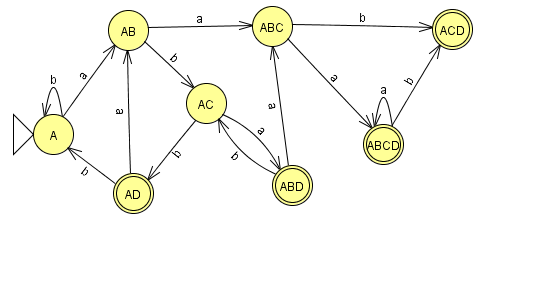